In [184]:
#USER RECOMMENDATION MODEL FOR AMAZON
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [185]:
amz = pd.read_csv("C:\\Users\\Simmy\\Desktop\\Amazon - Movies and TV Ratings.csv")

In [186]:
#EXPLORATORY DATA ANALYSIS
amz.head()



,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
#for checking the shape of dataset
amz.shape


(4848, 207)

In [157]:
#getting information about data
amz.info


<bound method DataFrame.info of              user_id  Movie1  Movie2  Movie3  Movie4  Movie5  Movie6  Movie7  \
0     A3R5OBKS7OM2IR     5.0     5.0     NaN     NaN     NaN     NaN     NaN   
1      AH3QC2PC1VTGP     NaN     NaN     2.0     NaN     NaN     NaN     NaN   
2     A3LKP6WPMP9UKX     NaN     NaN     NaN     5.0     NaN     NaN     NaN   
3      AVIY68KEPQ5ZD     NaN     NaN     NaN     5.0     NaN     NaN     NaN   
4     A1CV1WROP5KTTW     NaN     NaN     NaN     NaN     5.0     NaN     NaN   
...              ...     ...     ...     ...     ...     ...     ...     ...   
4843  A1IMQ9WMFYKWH5     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4844  A1KLIKPUF5E88I     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4845   A5HG6WFZLO10D     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4846  A3UU690TWXCG1X     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4847   AI4J762YI6S06     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

      M

In [158]:
#getting description of data and its transpose
amz.describe().T

,count,mean,std,min,25%,50%,75%,max
Movie1,1.0,5.000000,NaN,5.0,5.00,5.0,5.0,5.0
Movie2,1.0,5.000000,NaN,5.0,5.00,5.0,5.0,5.0
Movie3,1.0,2.000000,NaN,2.0,2.00,2.0,2.0,2.0
Movie4,2.0,5.000000,0.000000,5.0,5.00,5.0,5.0,5.0
Movie5,29.0,4.103448,1.496301,1.0,4.00,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...
Movie202,6.0,4.333333,1.632993,1.0,5.00,5.0,5.0,5.0
Movie203,1.0,3.000000,NaN,3.0,3.00,3.0,3.0,3.0
Movie204,8.0,4.375000,1.407886,1.0,4.75,5.0,5.0,5.0
Movie205,35.0,4.628571,0.910259,1.0,5.00,5.0,5.0,5.0


<AxesSubplot:ylabel='Frequency'>

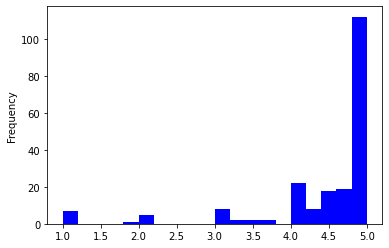

In [159]:
#ploting the mean frequency
amz.describe().T['mean'].plot(bins=20, kind='hist', color = 'blue')


In [160]:
# Movie that has maxmium view
amz.describe().T['count'].sort_values(ascending=False)[:1].to_frame()



,count
Movie127,2313.0


<AxesSubplot:ylabel='Frequency'>

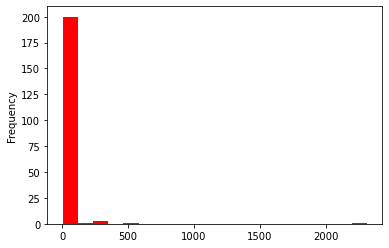

In [161]:
#ploting the count frequency
amz.describe().T['count'].plot(bins=20, kind='hist', color = 'red')
                        


In [162]:
# all together movies rating,max view movie
amz.drop('user_id',axis=1).sum().sort_values(ascending=False)[:10].to_frame()


,0
Movie127,9511.0
Movie140,2794.0
Movie16,1446.0
Movie103,1241.0
Movie29,1168.0
Movie91,586.0
Movie92,482.0
Movie89,380.0
Movie158,318.0
Movie108,252.0


In [163]:
#Movie that has maximum rating:
amz.drop('user_id',axis=1).sum().sort_values(ascending=False)[:1].to_frame()

,0
Movie127,9511.0


In [164]:
# Average rating of each movie
amz.drop('user_id',axis=1).mean()


Movie1      5.000000
Movie2      5.000000
Movie3      2.000000
Movie4      5.000000
Movie5      4.103448
              ...   
Movie202    4.333333
Movie203    3.000000
Movie204    4.375000
Movie205    4.628571
Movie206    4.923077
Length: 206, dtype: float64

In [165]:
#for see the top 5 heads after finding mean
amz.drop('user_id',axis=1).mean().head(5)

Movie1    5.000000
Movie2    5.000000
Movie3    2.000000
Movie4    5.000000
Movie5    4.103448
dtype: float64

In [166]:
#top 5 movies with the maximum rating
amz.drop('user_id',axis=1).mean().sort_values(ascending=False)[0:5].to_frame()


,0
Movie1,5.0
Movie66,5.0
Movie76,5.0
Movie75,5.0
Movie74,5.0


In [167]:
#Movie that has minimum rating:
amz.drop('user_id',axis=1).min().sort_values(ascending=True)[:1].to_frame()

,0
Movie103,1.0


In [168]:
# Top 5 movies with least audience
amz.describe().T['count'].sort_values(ascending=True)[:5].to_frame()


,count
Movie1,1.0
Movie71,1.0
Movie145,1.0
Movie69,1.0
Movie68,1.0


In [169]:
#Importing Libraries for Building a Model
from surprise import Reader
from surprise import Dataset
from surprise import accuracy
from surprise import SVD
from surprise.model_selection import train_test_split


In [170]:
melt_data = amz.melt(id_vars = amz.columns[0],value_vars=amz.columns[1:],var_name="Movies",value_name="Rating")
melt_data
#The melt() function is used to convert a data frame with several measurement columns into 
#a data frame in this canonical format, which has one row for every observed (measured) value.



,user_id,Movies,Rating
0,A3R5OBKS7OM2IR,Movie1,5.0
1,AH3QC2PC1VTGP,Movie1,NaN
2,A3LKP6WPMP9UKX,Movie1,NaN
3,AVIY68KEPQ5ZD,Movie1,NaN
4,A1CV1WROP5KTTW,Movie1,NaN
...,...,...,...
998683,A1IMQ9WMFYKWH5,Movie206,5.0
998684,A1KLIKPUF5E88I,Movie206,5.0
998685,A5HG6WFZLO10D,Movie206,5.0
998686,A3UU690TWXCG1X,Movie206,5.0


In [171]:
#convert all the Nan values into integer
amz.fillna(0, inplace=True)
amz.head(5)

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AH3QC2PC1VTGP,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A3LKP6WPMP9UKX,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AVIY68KEPQ5ZD,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A1CV1WROP5KTTW,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [172]:
from surprise import Dataset

In [173]:
#creating a dataset for training and testing
rd = Reader(rating_scale=(-1,10))
data = Dataset.load_from_df(melt_data.fillna(0),reader=rd)
data

In [174]:
train_data,test_data = train_test_split(data,test_size=0.20)

In [201]:
from surprise import SVD

In [202]:
#Using SVD (Singular Value Descomposition) # svd is a algorithm,different from PCA,PCA is for dimensionality 
#reduction however svd is expansion d matrices digonally for best manipulation and analysis.
#What is the difference between SVD and PCA? SVD gives you the whole nine-yard of diagonalizing a matrix 
#into special matrices that are easy to manipulate and to analyze. It lay down the foundation to untangle 
#data into independent components. PCA skips less significant components.

svd = SVD()

In [203]:
svd.fit(train_data)


In [204]:
pred = svd.test(test_data)


In [205]:
#for testing accuracy of the Model by RMSE
accuracy.rmse(pred) #root mean square errror,
#RMSE: Root Mean Square Error is the measure of how well a regression line fits the data points. 
#RMSE is calculated as the square root of the mean of the squared differences between actual outcomes 
#and predictions. 

RMSE: 0.2801


0.28007161626013766

In [206]:
#for testing accuracy of the Model by MAE
accuracy.mae(pred)#Mean Absolute Error (MAE) will be the average vertical distance between each point and
#the N=M line
#Root Mean Squared Error (RMSE)and Mean Absolute Error (MAE) are metrics used to 
#evaluate a Regression Model. These metrics tell us how accurate our predictions are and, 
#what is the amount of deviation from the actual values.



MAE:  0.0406


0.04062722995065136

In [207]:
#Example to check closest value dats fits
u_id='AH3QC2PC1VTGP'
mv = 'Movie206'
r_id = 5.0
svd.predict(u_id, mv, r_ui=r_id, verbose= True)


user: AH3QC2PC1VTGP item: Movie206   r_ui = 5.00   est = -0.00   {'was_impossible': False}


Prediction(uid='AH3QC2PC1VTGP', iid='Movie206', r_ui=5.0, est=-0.0031375791323596473, details={'was_impossible': False})

In [208]:
from surprise.model_selection import cross_validate

In [209]:
#CROSS VALIDATION PERFORM(Divide the data into n of folds between test n train ,here we can not split the data
#so do the cross validation in 3 folds)
cross_validate(svd, data, measures = ['RMSE', 'MAE'], cv = 3, verbose = True) #verbose is better way to write

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.2861  0.2811  0.2795  0.2822  0.0028  
MAE (testset)     0.0432  0.0427  0.0421  0.0427  0.0004  
Fit time          57.97   59.19   59.46   58.88   0.65    
Test time         5.24    4.82    4.69    4.92    0.23    


{'test_rmse': array([0.28610237, 0.28105875, 0.2795097 ]),
 'test_mae': array([0.04318363, 0.04270034, 0.04212361]),
 'fit_time': (57.974963903427124, 59.19076585769653, 59.459301233291626),
 'test_time': (5.241673469543457, 4.820931434631348, 4.691131114959717)}

In [210]:
#Function to iterarate data after putting required algorithms
def repeat(ml_type,dframe,min_,max_):
    rd = Reader()
    data = Dataset.load_from_df(dframe,reader=rd)
    print(cross_validate(ml_type, data, measures = ['RMSE', 'MAE'], cv = 3, verbose = True))
    print("#"*10)
    u_id = 'AH3QC2PC1VTGP'
    m_id = 'Movie206'
    ra_u = 5.0
    print(ml_type.predict(u_id,mv,r_ui=ra_u,verbose=True))
    print("#"*10)
    print()


In [211]:
amz= amz.iloc[:1212, :50] #(take one fourth value of :4848,:206 ) using for index location
movie_data = amz.melt(id_vars = amz.columns[0],value_vars=amz.columns[1:],var_name="Movies",value_name="Rating")


In [212]:
#For checking by the mean and median as well for the closest value which is good for predicted model
repeat(SVD(),movie_data.fillna(0),-1,10)
repeat(SVD(),movie_data.fillna(movie_data.mean()),-1,10)
repeat(SVD(),movie_data.fillna(movie_data.median()),-1,10)


Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0648  1.0751  1.0722  1.0707  0.0043  
MAE (testset)     1.0320  1.0364  1.0341  1.0342  0.0018  
Fit time          3.36    3.44    3.52    3.44    0.07    
Test time         0.17    0.19    0.19    0.18    0.01    
{'test_rmse': array([1.06482657, 1.07514864, 1.07218977]), 'test_mae': array([1.03195807, 1.03643379, 1.03410039]), 'fit_time': (3.35746169090271, 3.443681001663208, 3.5190858840942383), 'test_time': (0.1735398769378662, 0.1895287036895752, 0.18551111221313477)}
##########
user: AH3QC2PC1VTGP item: Movie206   r_ui = 5.00   est = 1.00   {'was_impossible': False}
user: AH3QC2PC1VTGP item: Movie206   r_ui = 5.00   est = 1.00   {'was_impossible': False}
##########

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.1000  0.0736  0.0955  0.0897  0.0115  
MAE (testset)

In [213]:
#Trying grid search and find optimum hyperparameter value for n_factors
from surprise.model_selection import GridSearchCV # gridsearch for gradients(small jumps to maxima to 
#minima in graph,small jumps called lr )


In [223]:
param_grid = {'n_epochs':[20,30], # (how many times iterations i want is called epochs)
             'lr_all':[0.005,0.001],#(lr = learning rate)
             'n_factors':[50,100]} # parameter grid..how many features i want to reduce is n factors

In [224]:
gs = GridSearchCV(SVD,param_grid,measures=['rmse','mae'],cv=3)
gs.fit(data)


In [225]:
#for getting the best score
gs.best_score


{'rmse': 0.27966469152102175, 'mae': 0.04112579859463261}

In [226]:
#print the best scores
print(gs.best_score["rmse"])
print(gs.best_params["rmse"])


0.27966469152102175
{'n_epochs': 30, 'lr_all': 0.005, 'n_factors': 50}
